In [1]:
# Scatter Matrix

import seaborn as sns
from functions import *
import pandas as pd

# ----------- GALILEO ------------

galileo_wrt_callisto_cphio_CA = get_closest_approach_data("galileo", "callisto", "cphio", "G")
callisto_wrt_jupiter_cphio_CA = get_closest_approach_data("callisto", "jupiter", "cphio", "G")
callisto_wrt_jupiter_JSO_CA = get_closest_approach_data("callisto", "jupiter", "jupsunorb", "G")
sun_wrt_callisto_cphio_CA = get_closest_approach_data("sun", "callisto", "cphio", "G")
callisto_wrt_jupiter_SIII_mag_CA = get_closest_approach_data("callisto", "jupiter", "SIII_mag", "G")
jupiter_wrt_sun_IAU_CA = get_closest_approach_data('jupiter', 'sun', 'IAU_SUN', 'G')

# collects important data from the individual frames

G_important_info_jcalcphio = np.array(['theta (CPhio)', 'phi (CPhiO)'])
for orbit, vector in galileo_wrt_callisto_cphio_CA.items():
    important_info_i = [vector[5], vector[6]]
    G_important_info_jcalcphio = np.c_[G_important_info_jcalcphio, important_info_i]

G_important_info_caljupjso = np.array(['phi (JSO)'])
for orbit, vector in callisto_wrt_jupiter_JSO_CA.items():
    important_info_i = [vector[6]]
    G_important_info_caljupjso = np.c_[G_important_info_caljupjso, important_info_i]

G_important_info_caljupS3mag = np.array(['z (SIII Mag)'])
for orbit, vector in callisto_wrt_jupiter_SIII_mag_CA.items():
    important_info_i = [vector[3]]
    G_important_info_caljupS3mag = np.c_[G_important_info_caljupS3mag, important_info_i]

G_important_info_jupsunIAU = np.array(['phi (IAU_SUN)'])
for orbit, vector in jupiter_wrt_sun_IAU_CA.items():
    important_info_i = [vector[6]]
    G_important_info_jupsunIAU = np.c_[G_important_info_jupsunIAU, important_info_i]

G_important_info_jsun_daynightside_angle = np.array('psi (Day-Night)')
for i in range(len(galileo_wrt_callisto_cphio_CA)):
    jcal_vector = galileo_wrt_callisto_cphio_CA['CA_orbit%s' %(i+1)]
    suncal_vector = sun_wrt_callisto_cphio_CA['CA_orbit%s' %(i+1)]
    daynightside_angle = [angle_between(jcal_vector[1:4], suncal_vector[1:4])]
    G_important_info_jsun_daynightside_angle = np.c_[G_important_info_jsun_daynightside_angle, daynightside_angle]

# collects all important data into one array
G_important_data = np.r_[G_important_info_jcalcphio, G_important_info_caljupjso]
G_important_data = np.r_[G_important_data, G_important_info_caljupS3mag]
G_important_data = np.r_[G_important_data, G_important_info_jupsunIAU]
G_important_data = np.r_[G_important_data, G_important_info_jsun_daynightside_angle]
G_important_data = np.transpose(G_important_data)
G_attributes = G_important_data[0,:]


# ----------- JUICE ------------

juice_wrt_callisto_cphio_CA = get_closest_approach_data("juice", "callisto", "cphio", "J")
callisto_wrt_jupiter_cphio_CA = get_closest_approach_data("callisto", "jupiter", "cphio", "J")
callisto_wrt_jupiter_JSO_CA = get_closest_approach_data("callisto", "jupiter", "jupsunorb", "J")
sun_wrt_callisto_cphio_CA = get_closest_approach_data("sun", "callisto", "cphio", "J")
callisto_wrt_jupiter_SIII_mag_CA = get_closest_approach_data("callisto", "jupiter", "SIII_mag", "J")
jupiter_wrt_sun_IAU_CA = get_closest_approach_data('jupiter', 'sun', 'IAU_SUN', 'J')

# collects important data from the individual frames

J_important_info_jcalcphio = np.array(['theta (CPhio)', 'phi (CPhiO)'])
for orbit, vector in juice_wrt_callisto_cphio_CA.items():
    important_info_i = [vector[5], vector[6]]
    J_important_info_jcalcphio = np.c_[J_important_info_jcalcphio, important_info_i]

J_important_info_caljupjso = np.array(['phi (JSO)'])
for orbit, vector in callisto_wrt_jupiter_JSO_CA.items():
    important_info_i = [vector[6]]
    J_important_info_caljupjso = np.c_[J_important_info_caljupjso, important_info_i]

J_important_info_caljupS3mag = np.array(['z (SIII Mag)'])
for orbit, vector in callisto_wrt_jupiter_SIII_mag_CA.items():
    important_info_i = [vector[3]]
    J_important_info_caljupS3mag = np.c_[J_important_info_caljupS3mag, important_info_i]

J_important_info_jupsunIAU = np.array(['phi (IAU_SUN)'])
for orbit, vector in jupiter_wrt_sun_IAU_CA.items():
    important_info_i = [vector[6]]
    J_important_info_jupsunIAU = np.c_[J_important_info_jupsunIAU, important_info_i]

J_important_info_jsun_daynightside_angle = np.array('psi (Day-Night)')
for i in range(len(juice_wrt_callisto_cphio_CA)):
    jcal_vector = juice_wrt_callisto_cphio_CA['CA_orbit%s' %(i+1)]
    suncal_vector = sun_wrt_callisto_cphio_CA['CA_orbit%s' %(i+1)]
    daynightside_angle = [angle_between(jcal_vector[1:4], suncal_vector[1:4])]
    J_important_info_jsun_daynightside_angle = np.c_[J_important_info_jsun_daynightside_angle, daynightside_angle]

# collects all important data into one array
J_important_data = np.r_[J_important_info_jcalcphio, J_important_info_caljupjso]
J_important_data = np.r_[J_important_data, J_important_info_caljupS3mag]
J_important_data = np.r_[J_important_data, J_important_info_jupsunIAU]
J_important_data = np.r_[J_important_data, J_important_info_jsun_daynightside_angle]
J_important_data = np.transpose(J_important_data)
J_attributes = J_important_data[0,:]

# scales z (SIII Mag) to R_J
a = G_important_data[1:, 3]
a = a.astype(float)
a = a / np.array(R_J)

x = J_important_data[1:, 3]
x = x.astype(float)
x = x / np.array(R_J)

G_important_data[1:, 3] = a
J_important_data[1:, 3] = x

# converts angles to degrees
b = G_important_data[1:, :3].astype(float)
c = G_important_data[1:, 4:].astype(float)
y = J_important_data[1:, :3].astype(float)
z = J_important_data[1:, 4:].astype(float)

b = (b * np.array(180))/ np.array(np.pi)
c = (c * np.array(180))/ np.array(np.pi)
y = (y * np.array(180))/ np.array(np.pi)
z = (z * np.array(180))/ np.array(np.pi)

G_important_data[1:, :3] = b
G_important_data[1:, 4:] = c
J_important_data[1:, :3] = y
J_important_data[1:, 4:] = z

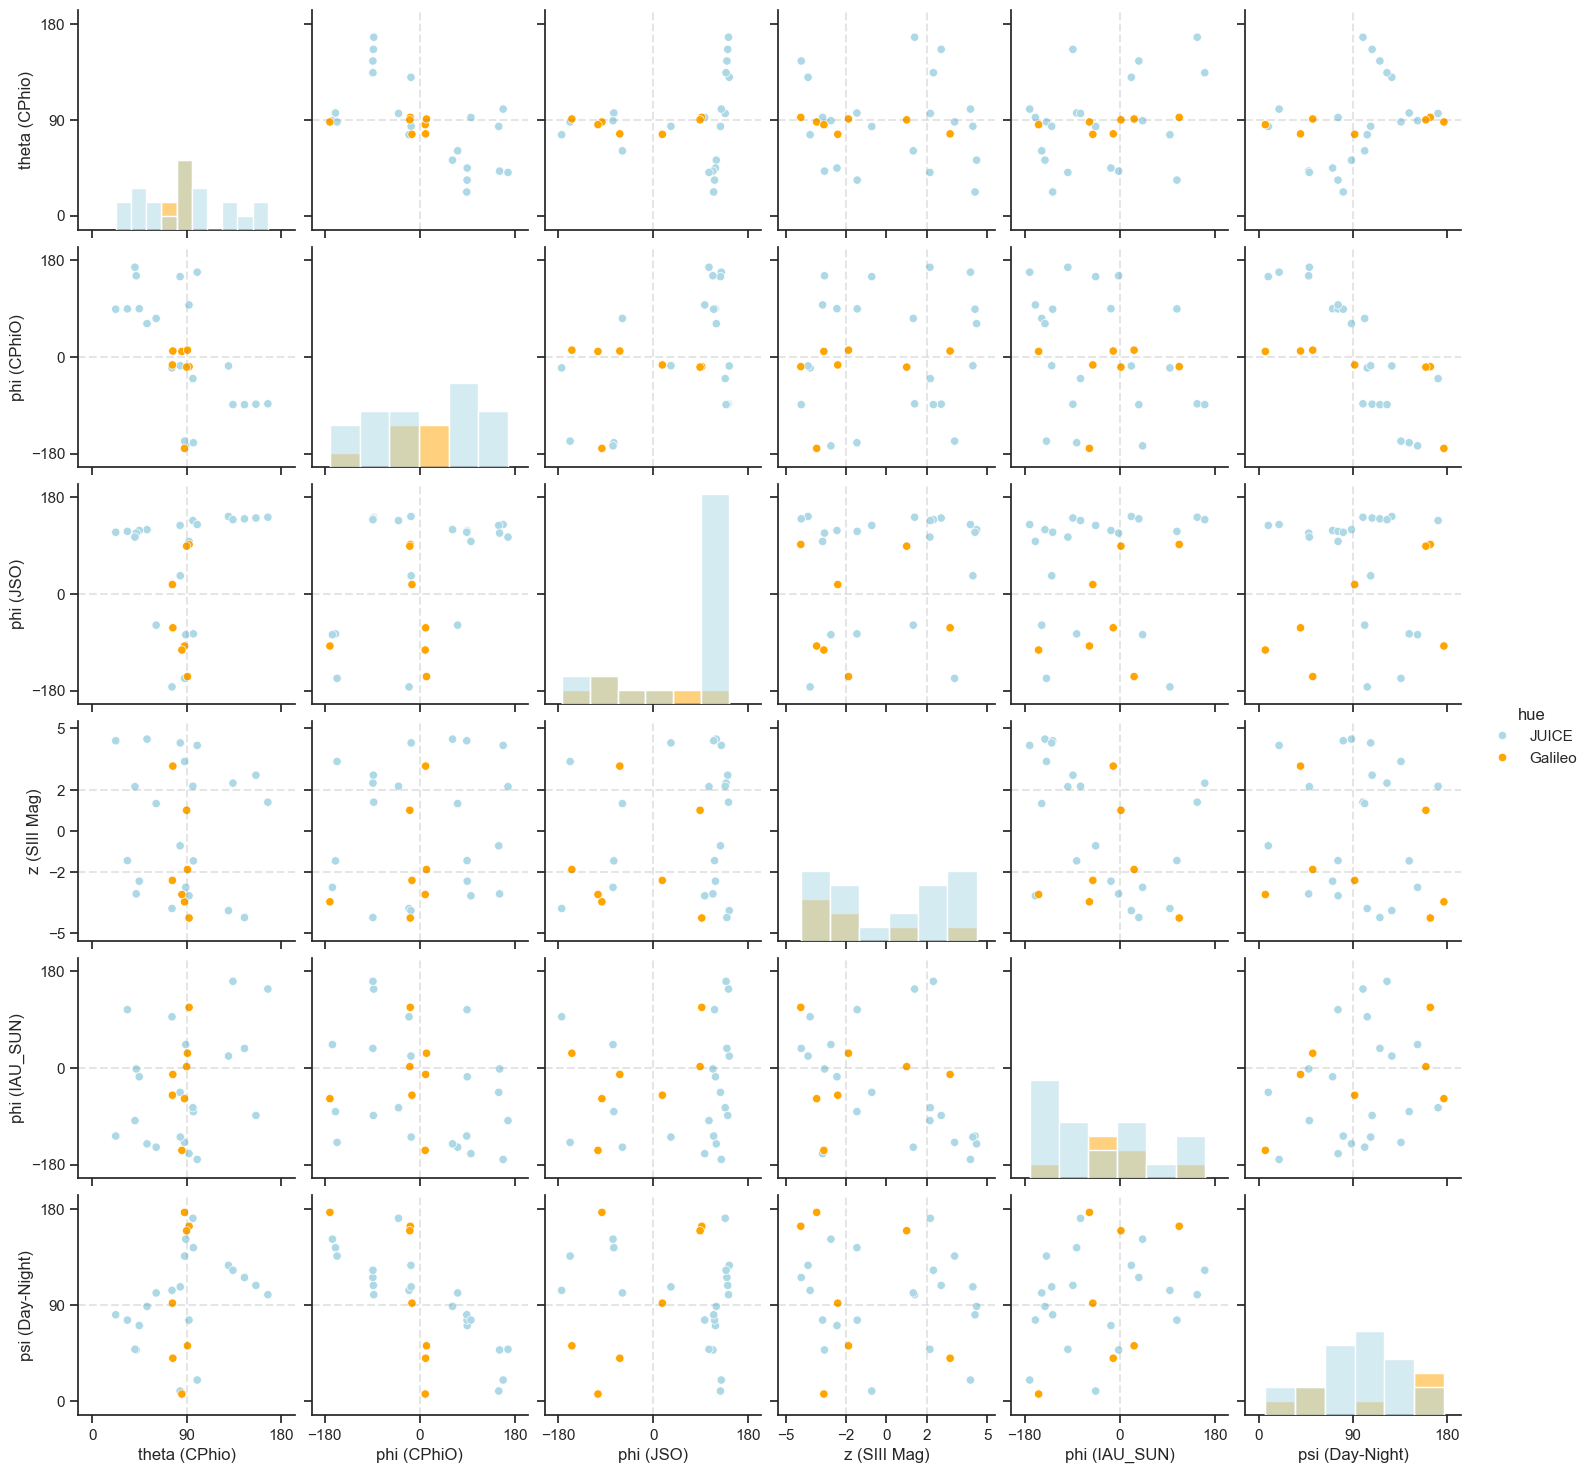

In [2]:
# sets limits for the graphs
theta_cphio_lims = [-13.5, 193.5] ; theta_cphio_ticks = [0, 90, 180]
z_S3Mag_lims = [-5.375,5.375] ; z_S3Mag_ticks = [-5, -2, 0, 2, 5]
daynightside_lims = [-13.5, 193.5] ; daynightside_ticks = [0, 90, 180]
phi_lims = [-205, 205] ; phi_ticks = [-180, 0, 180]
lims = [theta_cphio_lims, phi_lims, phi_lims, z_S3Mag_lims, phi_lims, daynightside_lims]
ticks = [theta_cphio_ticks, phi_ticks, phi_ticks, z_S3Mag_ticks, phi_ticks, daynightside_ticks]
# plots and saves all graphs from 2 - 21 orbits to generate gif of coverage progression

all_graphs = -19
final_graph = 0

for k in range(final_graph, 1):
    if k == 0:
        J_important_data_i = J_important_data[1:,:]
        G_important_data_i = G_important_data[1:,:]
    else:
        J_important_data_i = J_important_data[1:k,:]
        G_important_data_i = G_important_data[1:k,:]

    J_df = pd.DataFrame(J_important_data_i, columns=J_attributes)
    G_df = pd.DataFrame(G_important_data_i, columns=G_attributes)

    J_df = J_df.astype(float)
    G_df = G_df.astype(float)

    sns.set(style="ticks")
    g = sns.pairplot(pd.concat([J_df.assign(hue='JUICE'), G_df.assign(hue='Galileo')]), hue='hue', diag_kind='hist', palette=['lightblue', 'orange'])
    
    # Set limits for graphs
    for i in range(6):
        for j in range(6):
            g.axes[i, j].set_xlim(lims[j])
            g.axes[i, j].set_xticks(ticks[j])
            if i != j:
                g.axes[i, j].set_ylim(lims[i])
                g.axes[i, j].set_yticks(ticks[i])

    # Draw grouping lines on graphs
    for i in range(6):
        for j in range(6):
            if i != j:
                if i == 0: 
                    g.axes[i, j].axhline(90, color='gray', linestyle='dashed', alpha=0.2)
                elif i == 1:
                    g.axes[i, j].axhline(0, color='gray', linestyle='dashed', alpha=0.2)
                elif i == 2:
                    g.axes[i, j].axhline(0, color='gray', linestyle='dashed', alpha=0.2)
                elif i == 3:
                    g.axes[i, j].axhline(-2, color='gray', linestyle='dashed', alpha=0.2)
                    g.axes[i, j].axhline(2, color='gray', linestyle='dashed', alpha=0.2)
                elif i == 4:
                    g.axes[i, j].axhline(0, color='gray', linestyle='dashed', alpha=0.2)
                elif i == 5:
                    g.axes[i, j].axhline(90, color='gray', linestyle='dashed', alpha=0.2)
                
                if j == 0:
                    g.axes[i, j].axvline(90, color='gray', linestyle='dashed', alpha=0.2)
                elif j == 1:
                    g.axes[i, j].axvline(0, color='gray', linestyle='dashed', alpha=0.2)
                elif j == 2:
                    g.axes[i, j].axvline(0, color='gray', linestyle='dashed', alpha=0.2)
                elif j == 3:
                    g.axes[i, j].axvline(-2, color='gray', linestyle='dashed', alpha=0.2)
                    g.axes[i, j].axvline(2, color='gray', linestyle='dashed', alpha=0.2)
                elif j == 4:
                    g.axes[i, j].axvline(0, color='gray', linestyle='dashed', alpha=0.2)
                elif j == 5:
                    g.axes[i, j].axvline(90, color='gray', linestyle='dashed', alpha=0.2)


#plt.savefig('scatter_matrix_%s.png' % (21+k))
plt.show()

In [9]:
print(G_important_data_i.transpose()[0])
print(G_important_data_i.transpose()[1])

['76.82590196411842' '87.97353290748437' '85.46552792535395'
 '90.79910224525065' '92.35172012162805' '90.0' '76.40318968069442']
['10.849504690193982' '-170.34507697562645' '10.09284611881175'
 '12.485467490857156' '-18.248924218414494' '-19.06454743133229'
 '-15.064835068844133']
